We'll simulate:

- Treatment group: listings with improved (longer) descriptions
- Control group: original listings
- Simulated bookings based on available features + added treatment effect
 

## Data Ingestion

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from modules.data_ingestion import DataIngestion

In [4]:
ingestor = DataIngestion("/Users/pratiibhas/Documents/ML Projects/AB Testing framework/data/calendar.csv")
data_dict = ingestor.load()

for filename, df in data_dict.items():
    print(f"File: {filename}, Shape: {df.shape}")


/Users/pratiibhas/Documents/ML Projects/AB Testing framework/modules/data_ingestion.py:14: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath)


File: listing_id, Shape: (19161349,)
File: date, Shape: (19161349,)
File: available, Shape: (19161349,)
File: price, Shape: (19161349,)
File: adjusted_price, Shape: (19161349,)
File: minimum_nights, Shape: (19161349,)
File: maximum_nights, Shape: (19161349,)


In [5]:
data_dict

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,338837,2025-03-27,f,$70.00,NaN,4.0,1125.0
1,338837,2025-03-28,f,$70.00,NaN,4.0,1125.0
2,338837,2025-03-29,f,$70.00,NaN,4.0,1125.0
3,338837,2025-03-30,f,$70.00,NaN,4.0,1125.0
4,338837,2025-03-31,f,$70.00,NaN,4.0,1125.0
...,...,...,...,...,...,...,...
19161344,1384528111054216962,2026-03-25,t,$85.00,NaN,2.0,31.0
19161345,1384528111054216962,2026-03-26,t,$85.00,NaN,2.0,31.0
19161346,1384528111054216962,2026-03-27,t,$85.00,NaN,2.0,31.0
19161347,1384528111054216962,2026-03-28,t,$85.00,NaN,2.0,31.0


In [6]:
ingestor = DataIngestion("/Users/pratiibhas/Documents/ML Projects/AB Testing framework/data")  # ✅ a directory
data_dict = ingestor.load()  # ✅ Returns a dict of DataFrames

for filename, df in data_dict.items():
    print(f"File: {filename}, Shape: {df.shape}")


/Users/pratiibhas/Documents/ML Projects/AB Testing framework/modules/data_ingestion.py:14: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath)


File: reviews.csv, Shape: (1058404, 2)
File: reviews-2.csv, Shape: (1058404, 6)
File: neighbourhoods.csv, Shape: (390, 2)
File: listings.csv, Shape: (52472, 79)
File: calendar.csv, Shape: (19161349, 7)


In [7]:
data_dict['listings.csv']

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,7011,https://www.airbnb.com/rooms/7011,20250326054816,2025-03-27,city scrape,SEASIDE - Historic Antique Residence,WINEYARD WITH COLOURS OF THE SEASIDE.<br /><br...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,16888,...,4.72,4.59,4.59,19081011C235687,t,10,10,0,0,0.17
1,22948,https://www.airbnb.com/rooms/22948,20250326054816,2025-03-31,city scrape,BnB center near station with balcony and break...,Near the Central Station and the beginning of ...,"The neighborhood is in a residential area, cen...",https://a0.muscache.com/pictures/hosting/Hosti...,88837,...,4.82,4.89,4.85,IT084001C1KUVGVHF9,t,3,0,3,0,2.51
2,35264,https://www.airbnb.com/rooms/35264,20250326054816,2025-03-26,city scrape,Etna-sea a panoramic villa,"Our country house, swathed in the greenery of ...","Contact with nature, relaxation, remarkable pa...",https://a0.muscache.com/pictures/7dc73c6a-7bee...,151644,...,4.81,4.86,4.76,IT087035B5VYN4LFLN,f,5,5,0,0,0.88
3,43992,https://www.airbnb.com/rooms/43992,20250326054816,2025-03-27,city scrape,Two steps from the sea,Very nice flat in front of the beach with a wo...,NaN,https://a0.muscache.com/pictures/9495798/e9cfb...,192525,...,4.94,4.51,4.64,IT081008C26PNHNIA6,f,2,2,0,0,0.48
4,43995,https://www.airbnb.com/rooms/43995,20250326054816,2025-03-28,city scrape,Villa Verdemare,Wonderful villa that can easily accommodate up...,NaN,https://a0.muscache.com/pictures/9498289/eef27...,192525,...,4.92,4.72,4.72,IT081020C2NSGROBUN,f,2,2,0,0,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52467,1384210136667389775,https://www.airbnb.com/rooms/1384210136667389775,20250326054816,2025-03-26,city scrape,Sicilya Room,Sicilya Room is a private room perfect for sho...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,12864335,...,NaN,NaN,NaN,IT081012C27FE05YZO,f,2,0,2,0,NaN
52468,1384212716654871969,https://www.airbnb.com/rooms/1384212716654871969,20250326054816,2025-03-28,city scrape,Grande Appartamento Vifra,Large 110 sqm apartment consisting of two larg...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,467029464,...,NaN,NaN,NaN,IT081021C2XL5IEYTZ,f,4,4,0,0,NaN
52469,1384233846014569778,https://www.airbnb.com/rooms/1384233846014569778,20250326054816,2025-03-30,city scrape,Alloggio nel cuore di Catania,"In the center of Catania, our cozy vacation ho...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,452060167,...,NaN,NaN,NaN,IT087015C2KCTRT4EM,f,1,1,0,0,NaN
52470,1384294318565318241,https://www.airbnb.com/rooms/1384294318565318241,20250326054816,2025-03-29,city scrape,La Suite del Poeta!,The Suite del Poeta is an apartment located on...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,36108440,...,NaN,NaN,NaN,"I applied for a CIN, but haven’t received it yet",t,8,8,0,0,NaN


## EDA

In [8]:
from modules.eda import run_eda

listings = data_dict['listings.csv'] 
reviews = data_dict['reviews.csv'] 
reviews_2 = data_dict['reviews-2.csv'] 



In [8]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [9]:
reviews_2

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7011,8283,2009-08-26,19620,Ivan,Hello!\r<br/>It was wonderfull!!!! Greatfull a...
1,7011,65032,2010-07-15,160517,Helen,Yumi and Adriano were wonderful hosts. We sta...
2,7011,103213,2010-09-23,161498,Debra,We chose to go to Sicily and Marsala because w...
3,7011,225115,2011-04-13,242583,Antoinette,Our stay at the Villa Salinara was a total del...
4,7011,349054,2011-07-03,228192,Sara,We stayed at Villa Salinara last week (late Ju...
...,...,...,...,...,...,...
1058399,1380331277653828157,1384025004662482549,2025-03-24,149946529,Guillaume,Très content des deux jours passés dans cet ap...
1058400,1375982908811585699,1388349768600858890,2025-03-30,40682032,Elisa,Il mio soggiorno a Villa Amoroso è stato un'es...
1058401,1376041334903754809,1383299594622662341,2025-03-23,533300809,Anna Maria,"Bellissima struttura, in pieno centro storico ..."
1058402,1376065007513877161,1387617516089440524,2025-03-29,544186583,Daniele,"Appartamento molto pulito, il proprietario è s..."


In [10]:
run_eda(reviews_2)

📊 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058404 entries, 0 to 1058403
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1058404 non-null  int64 
 1   id             1058404 non-null  int64 
 2   date           1058404 non-null  object
 3   reviewer_id    1058404 non-null  int64 
 4   reviewer_name  1058401 non-null  object
 5   comments       1058380 non-null  object
dtypes: int64(3), object(3)
memory usage: 48.5+ MB
None

🧮 Summary Statistics:
          listing_id            id        date   reviewer_id reviewer_name  \
count   1.058404e+06  1.058404e+06     1058404  1.058404e+06       1058401   
unique           NaN           NaN        4683           NaN         76165   
top              NaN           NaN  2024-08-17           NaN        Andrea   
freq             NaN           NaN        1589           NaN          7104   
mean    1.686148e+17  6.354441e+17        

(['date', 'id', 'reviewer_name', 'comments'], ['listing_id', 'reviewer_id'])

Here is some confusion, since our id, listing ids are numerical it shows id ,listing_ids as numeric type but since an id , listing id is used for the purpose of identification they are categorical

### ✅  id, listing ids should be treated as categorical (or even ignored) during analysis.

In [11]:
categorical_cols_reviews = ['reviewer_name', 'date', 'comments', 'id','listing_id', 'reviewer_id'] 

In [12]:
listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,7011,https://www.airbnb.com/rooms/7011,20250326054816,2025-03-27,city scrape,SEASIDE - Historic Antique Residence,WINEYARD WITH COLOURS OF THE SEASIDE.<br /><br...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,16888,...,4.72,4.59,4.59,19081011C235687,t,10,10,0,0,0.17
1,22948,https://www.airbnb.com/rooms/22948,20250326054816,2025-03-31,city scrape,BnB center near station with balcony and break...,Near the Central Station and the beginning of ...,"The neighborhood is in a residential area, cen...",https://a0.muscache.com/pictures/hosting/Hosti...,88837,...,4.82,4.89,4.85,IT084001C1KUVGVHF9,t,3,0,3,0,2.51
2,35264,https://www.airbnb.com/rooms/35264,20250326054816,2025-03-26,city scrape,Etna-sea a panoramic villa,"Our country house, swathed in the greenery of ...","Contact with nature, relaxation, remarkable pa...",https://a0.muscache.com/pictures/7dc73c6a-7bee...,151644,...,4.81,4.86,4.76,IT087035B5VYN4LFLN,f,5,5,0,0,0.88
3,43992,https://www.airbnb.com/rooms/43992,20250326054816,2025-03-27,city scrape,Two steps from the sea,Very nice flat in front of the beach with a wo...,NaN,https://a0.muscache.com/pictures/9495798/e9cfb...,192525,...,4.94,4.51,4.64,IT081008C26PNHNIA6,f,2,2,0,0,0.48
4,43995,https://www.airbnb.com/rooms/43995,20250326054816,2025-03-28,city scrape,Villa Verdemare,Wonderful villa that can easily accommodate up...,NaN,https://a0.muscache.com/pictures/9498289/eef27...,192525,...,4.92,4.72,4.72,IT081020C2NSGROBUN,f,2,2,0,0,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52467,1384210136667389775,https://www.airbnb.com/rooms/1384210136667389775,20250326054816,2025-03-26,city scrape,Sicilya Room,Sicilya Room is a private room perfect for sho...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,12864335,...,NaN,NaN,NaN,IT081012C27FE05YZO,f,2,0,2,0,NaN
52468,1384212716654871969,https://www.airbnb.com/rooms/1384212716654871969,20250326054816,2025-03-28,city scrape,Grande Appartamento Vifra,Large 110 sqm apartment consisting of two larg...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,467029464,...,NaN,NaN,NaN,IT081021C2XL5IEYTZ,f,4,4,0,0,NaN
52469,1384233846014569778,https://www.airbnb.com/rooms/1384233846014569778,20250326054816,2025-03-30,city scrape,Alloggio nel cuore di Catania,"In the center of Catania, our cozy vacation ho...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,452060167,...,NaN,NaN,NaN,IT087015C2KCTRT4EM,f,1,1,0,0,NaN
52470,1384294318565318241,https://www.airbnb.com/rooms/1384294318565318241,20250326054816,2025-03-29,city scrape,La Suite del Poeta!,The Suite del Poeta is an apartment located on...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,36108440,...,NaN,NaN,NaN,"I applied for a CIN, but haven’t received it yet",t,8,8,0,0,NaN


In [13]:
run_eda(listings)

📊 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52472 entries, 0 to 52471
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            52472 non-null  int64  
 1   listing_url                                   52472 non-null  object 
 2   scrape_id                                     52472 non-null  int64  
 3   last_scraped                                  52472 non-null  object 
 4   source                                        52472 non-null  object 
 5   name                                          52472 non-null  object 
 6   description                                   50959 non-null  object 
 7   neighborhood_overview                         23073 non-null  object 
 8   picture_url                                   52472 non-null  object 
 9   host_id                                     

(['host_neighbourhood',
  'host_response_rate',
  'host_url',
  'last_scraped',
  'neighbourhood_cleansed',
  'host_thumbnail_url',
  'name',
  'host_location',
  'neighbourhood',
  'listing_url',
  'has_availability',
  'instant_bookable',
  'calendar_last_scraped',
  'host_acceptance_rate',
  'host_since',
  'last_review',
  'price',
  'room_type',
  'host_verifications',
  'bathrooms_text',
  'host_response_time',
  'amenities',
  'host_about',
  'license',
  'picture_url',
  'host_name',
  'property_type',
  'host_picture_url',
  'source',
  'host_identity_verified',
  'first_review',
  'host_has_profile_pic',
  'neighborhood_overview',
  'id',
  'description',
  'host_is_superhost'],
 ['scrape_id',
  'host_id',
  'host_listings_count',
  'host_total_listings_count',
  'neighbourhood_group_cleansed',
  'latitude',
  'longitude',
  'accommodates',
  'bathrooms',
  'bedrooms',
  'beds',
  'minimum_nights',
  'maximum_nights',
  'minimum_minimum_nights',
  'maximum_minimum_nights',
  

## EDA Plots


In [14]:
listings['price'] # wrongly classifes as category, thanks to that dollar($) sign

0        $219.00
1         $43.00
2        $109.00
3         $77.00
4         $93.00
          ...   
52467     $26.00
52468     $79.00
52469     $68.00
52470     $78.00
52471     $91.00
Name: price, Length: 52472, dtype: object

In [15]:
# so since we have alot of categorical vlaues we can decide which one to keep and which to discard  for the purpose to plot
# since our objective is to test whether longer description resulted in room bookings ,we will proceed accordingly.
categorical_cols_listings=  ['host_location', 'bathrooms_text', \
    'description', 'host_about', 'host_identity_verified', 'host_has_profile_pic', 'neighbourhood_cleansed', \
        'last_review', 'property_type', 'name',  'instant_bookable',\
            'first_review', 'neighbourhood', 'source', 'host_since', 'host_acceptance_rate', 'host_verifications', \
                'host_response_rate', 'neighborhood_overview', 'host_response_time', \
                    'host_is_superhost', 'room_type', 'host_picture_url', 'has_availability']

In [16]:
listings['host_neighbourhood']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
52467    NaN
52468    NaN
52469    NaN
52470    NaN
52471    NaN
Name: host_neighbourhood, Length: 52472, dtype: object

In [17]:
from modules.eda_univariate_analysis import  plot_cat_few_categories, plot_categoricals_top_n

⚠️ Skipping 'host_location' – 1325 unique values (too many).
⚠️ Skipping 'bathrooms_text' – 51 unique values (too many).
⚠️ Skipping 'description' – 45343 unique values (too many).
⚠️ Skipping 'host_about' – 8031 unique values (too many).


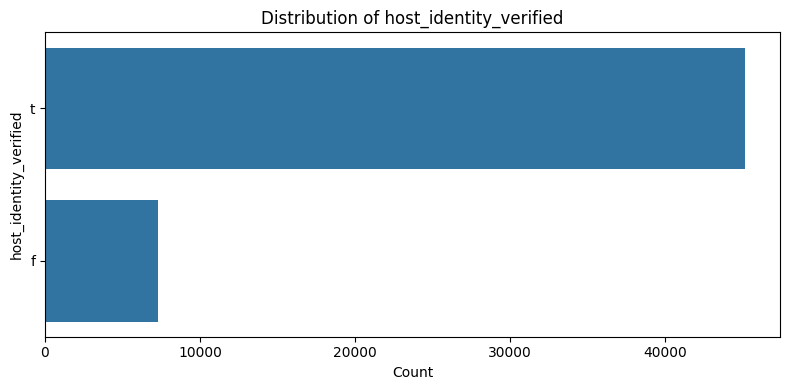

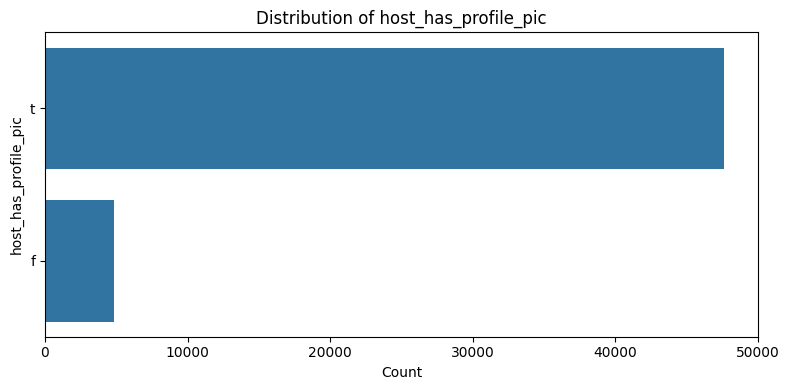

⚠️ Skipping 'neighbourhood_cleansed' – 373 unique values (too many).
⚠️ Skipping 'last_review' – 2096 unique values (too many).
⚠️ Skipping 'property_type' – 95 unique values (too many).
⚠️ Skipping 'name' – 50314 unique values (too many).


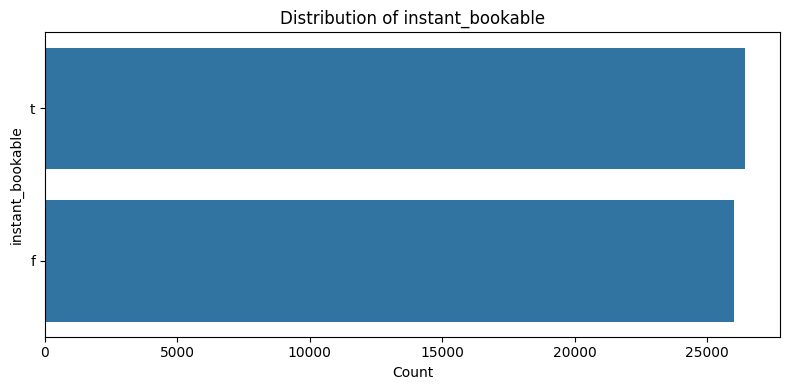

⚠️ Skipping 'first_review' – 3757 unique values (too many).
⚠️ Skipping 'neighbourhood' – 1928 unique values (too many).


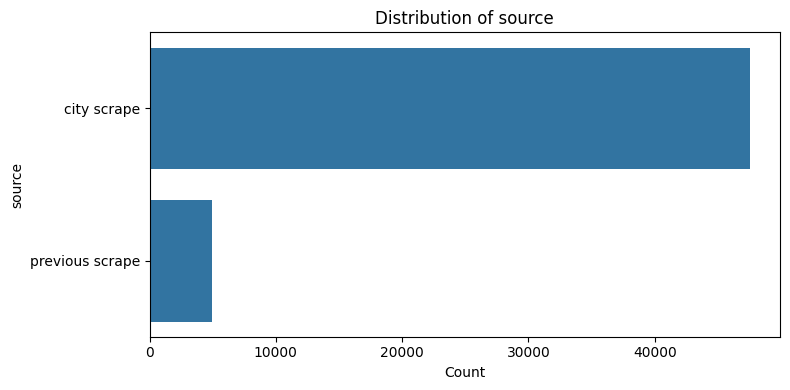

⚠️ Skipping 'host_since' – 4785 unique values (too many).
⚠️ Skipping 'host_acceptance_rate' – 101 unique values (too many).


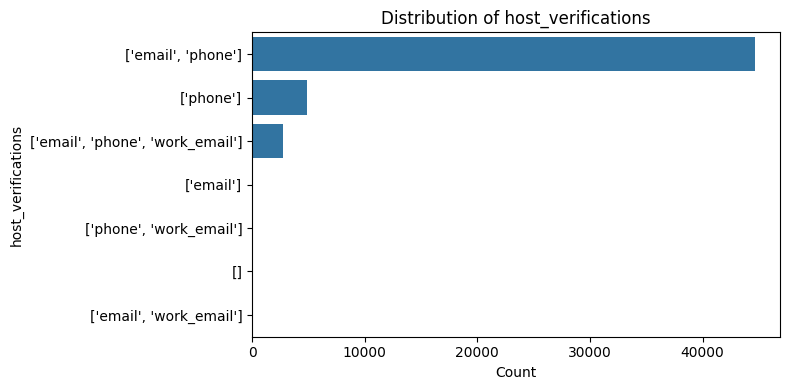

⚠️ Skipping 'host_response_rate' – 49 unique values (too many).
⚠️ Skipping 'neighborhood_overview' – 19180 unique values (too many).


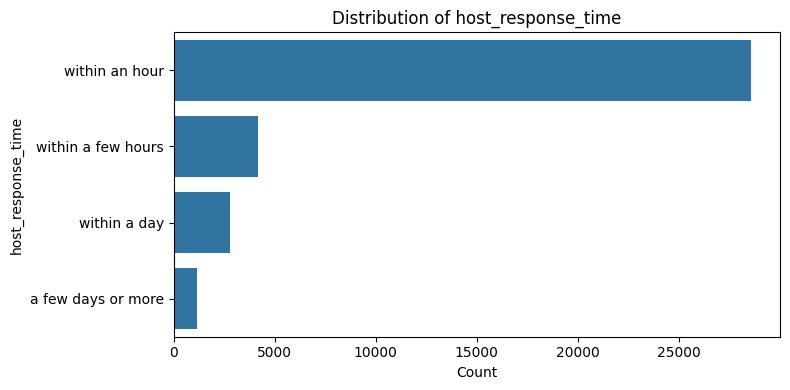

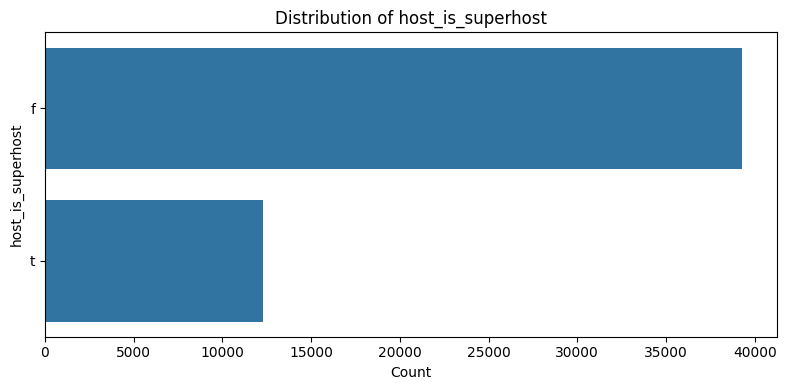

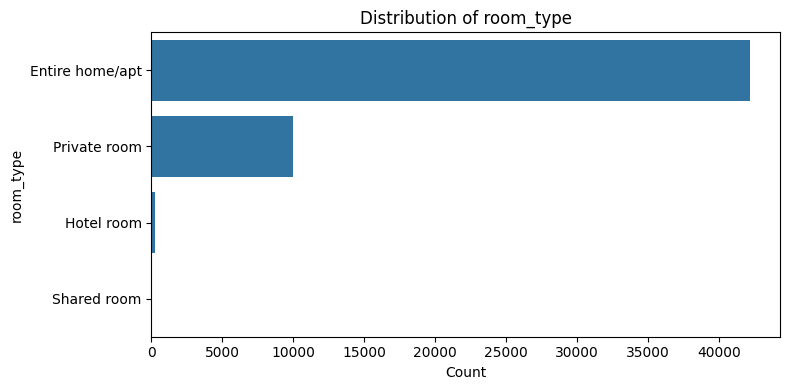

⚠️ Skipping 'host_picture_url' – 23691 unique values (too many).


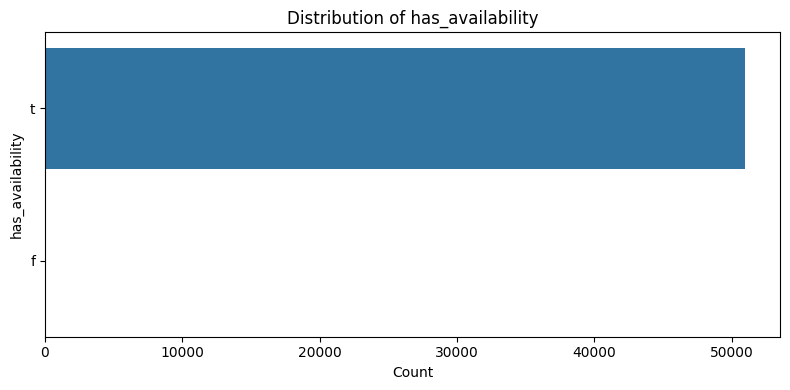

In [18]:
plot_cat_few_categories(listings,categorical_cols_listings)

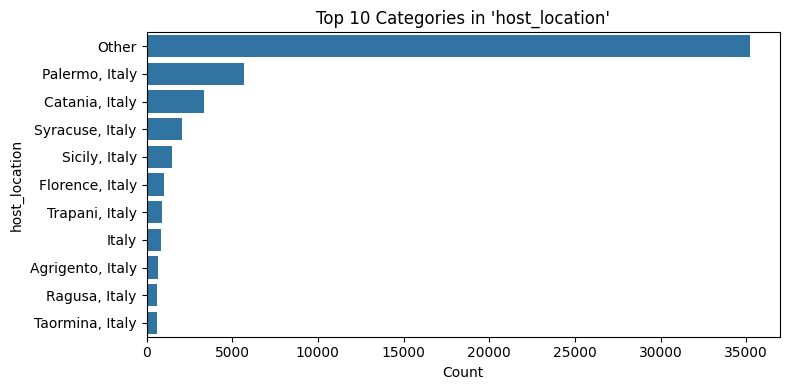

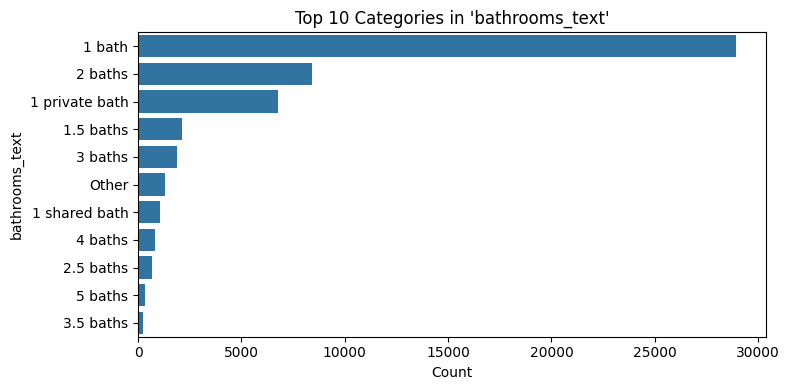

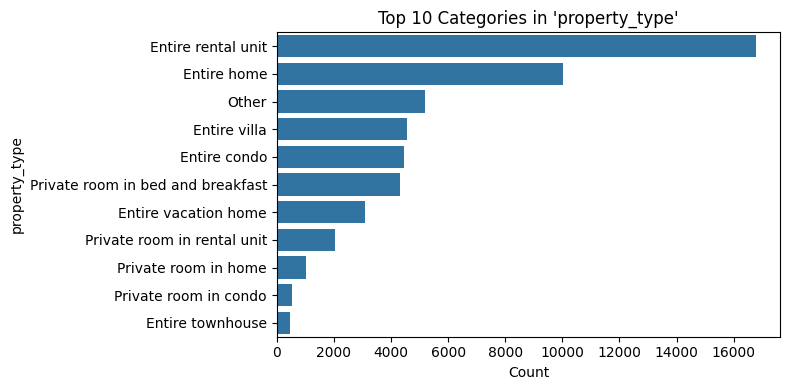

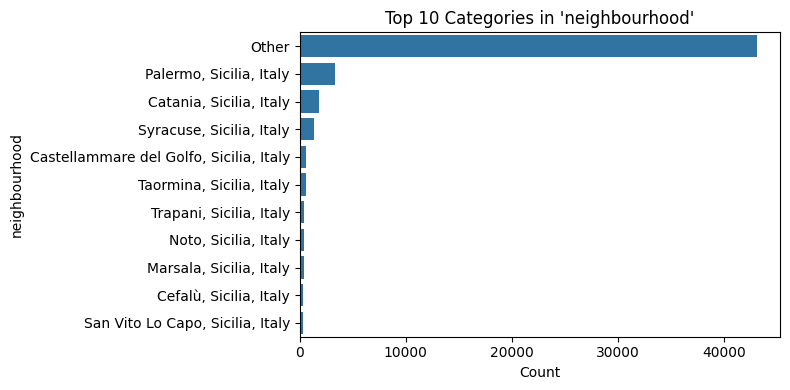

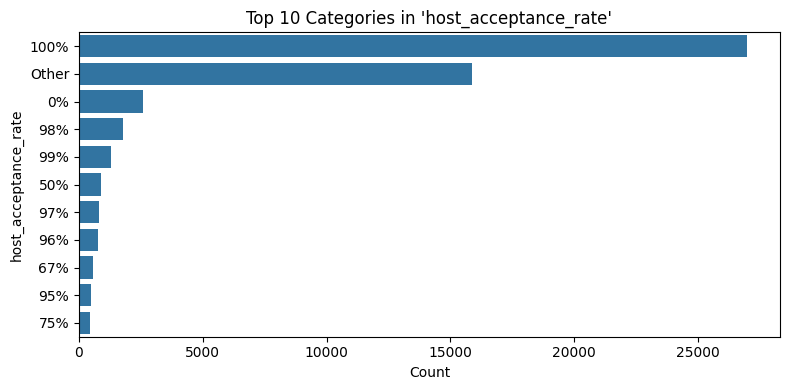

In [19]:
categorical_cols_listings=  ['host_location', 'bathrooms_text', \
        'property_type',  'neighbourhood',  'host_acceptance_rate']
plot_categoricals_top_n(listings,categorical_cols_listings)

## Define the A/B Test Clearly:
1. Null Hypothesis (H₀):
Listings with longer descriptions do not have significantly higher price or popularity (attractiveness) compared to those with shorter descriptions.
- Alternative Hypothesis (H₁):
Listings with longer descriptions have significantly higher price or popularity (depending on your KPI) than those with shorter descriptions.
2. Determine the KPI: booking outcome based on availability, rating, and description length
3. Define success metric: Is a 5% uplift in conversion enough?

Random assignment: Were users randomly assigned to control and treatment groups?
Balanced groups: Compare group sizes and user characteristics using summary stats.
Exposure consistency: Did users stay in the same group throughout?

3. Perform Pre-Experiment Checks

Before comparing outcomes, ensure:

✅ No major pre-existing differences between A and B groups.
Use t-tests or chi-square for pre-treatment variables.
Plot distributions of age, device type, previous purchases, etc.


5. Conduct the A/B Statistical Test

Based on your metric:

For binary outcomes (e.g., conversion):
- Proportion z-test / Chi-square test
- Bayesian A/B test if you're using probabilistic approaches

For continuous outcomes (e.g., revenue):
- T-test (independent samples)
- Mann-Whitney U (if data is non-normal)

For proportions with low sample sizes: 
-Fisher's exact test


In [19]:
from modules.simulation import generate_synthetic_data_from,simulate_ab_test,simulate_ab_test_logistics

In [12]:
listings= pd.read_csv('data/listings.csv')

### Removing unwanted columns and addinng columns that are needed

In [13]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [14]:
description_len = len(listings['description'])
listings['description_len'] = description_len

In [15]:
synthetic_df = generate_synthetic_data_from(listings, n_samples=1000, seed=42)
synthetic_df.head()

⚠️ Skipping column 'neighbourhood_group_cleansed' — no valid data.
⚠️ Skipping column 'calendar_updated' — no valid data.


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,description_len
0,8.116280e+17,https://www.airbnb.com/rooms/19541942,20250326054816,2025-03-28,previous scrape,Casa Vacanze - La casa di Dani,"A bright, spacious flat designed to meet every...",The house is a 5-minute walk from the square a...,https://a0.muscache.com/pictures/e0dce64a-ea61...,7.266954e+08,...,3.926844,4.467595,IT082009C2PO9Z8KC4,f,36.319426,-18.733489,1.798819,2,0.730685,52472
1,4.719469e+17,https://www.airbnb.com/rooms/585215675422559183,20250326054816,2025-03-30,previous scrape,Stanza con bagno privato colorata e centralissima,Villa dei Tramonti is a balcony overlooking th...,The Villa is located in a panoramic area on th...,https://a0.muscache.com/pictures/miso/Hosting-...,3.716919e+08,...,5.178829,4.874830,IT082053C2RZQI7JEP,f,-17.048245,-2.919140,9.522062,5,-0.583805,52472
2,8.923916e+17,https://www.airbnb.com/rooms/1356402762496611983,20250326054816,2025-03-29,previous scrape,Scenario Holiday's Home,Your family will be close to everything when y...,Located in the Arab neighborhood La Kalsa of P...,https://a0.muscache.com/pictures/miso/Hosting-...,2.248988e+07,...,4.458086,5.263178,IT087015C2U8EXOF82,f,-8.189771,-37.737343,2.738165,2,-0.168279,52472
3,1.360655e+18,https://www.airbnb.com/rooms/13327385,20250326054816,2025-03-26,previous scrape,Luxury 3 bedroom villa with pool,The accommodation is part of the Garden on the...,Our apartment is located in the heart of the h...,https://a0.muscache.com/pictures/miso/Hosting-...,2.791986e+08,...,4.667411,4.860439,IT082053C2J4E8L57G,f,-82.803601,-5.082821,1.795168,3,-0.120968,52472
4,4.206511e+17,https://www.airbnb.com/rooms/1078910148820206149,20250326054816,2025-03-30,previous scrape,C'ERA UNA VOLTA - appartamento IRIS,Cozy little apartment located on the cliff of...,"In the heart of the historic center, a few met...",https://a0.muscache.com/pictures/miso/Hosting-...,8.141458e+07,...,4.316896,4.782546,IT084020C27WO35QBL,f,24.928948,-4.723321,2.091182,2,0.880201,52472


In [16]:
def description_treatment(group):
    return 1 if group == 'treatment' else 0  # 1 = longer description

#  Simulate booking outcome based on availability, rating, and description length
def booking_outcome(row):
    score = (
        0.0008 * row.get('availability_365', 0) +
        0.04 * (row.get('review_scores_rating', 0) / 100) +
        0.25 * row.get('description_len', 0)
    )
    prob = 1 / (1 + np.exp(-score))
    return np.random.rand() < prob

In [17]:
listings['description_len'] = listings['description'].fillna("").apply(lambda x: len(str(x).split()))

### Z-test


📊 Outcome Rate by Group:
group
control      0.524851
treatment    0.577465
Name: outcome, dtype: float64

🔍 Z-Test Results:
Z-statistic: 1.6725
P-value:     0.0944
❌ No statistically significant difference between groups.


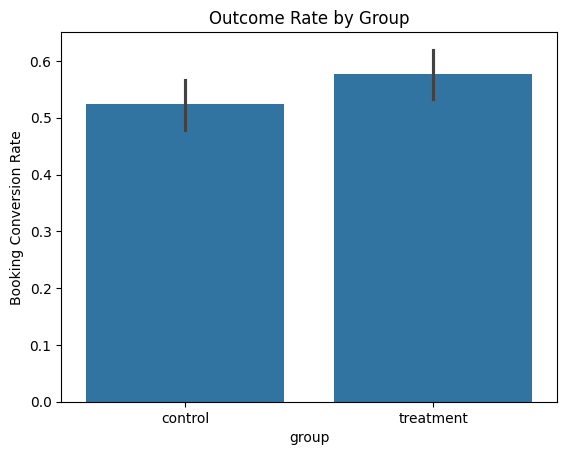

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,description_len,group,outcome
0,8.116280e+17,https://www.airbnb.com/rooms/19541942,20250326054816,2025-03-28,previous scrape,Casa Vacanze - La casa di Dani,"A bright, spacious flat designed to meet every...",The house is a 5-minute walk from the square a...,https://a0.muscache.com/pictures/e0dce64a-ea61...,7.266954e+08,...,IT082009C2PO9Z8KC4,f,36.319426,-18.733489,1.798819,2,0.730685,0,control,1
1,4.719469e+17,https://www.airbnb.com/rooms/585215675422559183,20250326054816,2025-03-30,previous scrape,Stanza con bagno privato colorata e centralissima,Villa dei Tramonti is a balcony overlooking th...,The Villa is located in a panoramic area on th...,https://a0.muscache.com/pictures/miso/Hosting-...,3.716919e+08,...,IT082053C2RZQI7JEP,f,-17.048245,-2.919140,9.522062,5,-0.583805,1,treatment,1
2,8.923916e+17,https://www.airbnb.com/rooms/1356402762496611983,20250326054816,2025-03-29,previous scrape,Scenario Holiday's Home,Your family will be close to everything when y...,Located in the Arab neighborhood La Kalsa of P...,https://a0.muscache.com/pictures/miso/Hosting-...,2.248988e+07,...,IT087015C2U8EXOF82,f,-8.189771,-37.737343,2.738165,2,-0.168279,1,treatment,0
3,1.360655e+18,https://www.airbnb.com/rooms/13327385,20250326054816,2025-03-26,previous scrape,Luxury 3 bedroom villa with pool,The accommodation is part of the Garden on the...,Our apartment is located in the heart of the h...,https://a0.muscache.com/pictures/miso/Hosting-...,2.791986e+08,...,IT082053C2J4E8L57G,f,-82.803601,-5.082821,1.795168,3,-0.120968,1,treatment,0
4,4.206511e+17,https://www.airbnb.com/rooms/1078910148820206149,20250326054816,2025-03-30,previous scrape,C'ERA UNA VOLTA - appartamento IRIS,Cozy little apartment located on the cliff of...,"In the heart of the historic center, a few met...",https://a0.muscache.com/pictures/miso/Hosting-...,8.141458e+07,...,IT084020C27WO35QBL,f,24.928948,-4.723321,2.091182,2,0.880201,0,control,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.955369e+17,https://www.airbnb.com/rooms/1072221015637825264,20250326054816,2025-03-27,city scrape,Trekking Accommodation,"Valuable apartment in the ""living room"" of Pal...",In the historic center of the city lives the t...,https://a0.muscache.com/pictures/hosting/Hosti...,3.687252e+08,...,19089002C212011,f,20.016126,79.210244,-0.986377,2,0.511845,0,control,0
996,1.507582e+18,https://www.airbnb.com/rooms/907167222475352567,20250326054816,2025-03-29,city scrape,"Roccalumera, Bandiera blu 2024 10km da Taormina",Cute and comfortable apartments just steps fro...,"It is located in Villaggio Peruzzo, it is a sm...",https://a0.muscache.com/pictures/3d003bc6-d108...,2.685654e+08,...,IT089002C27YNC28O3,f,-5.010408,95.359338,-0.466068,3,-0.457772,1,treatment,0
997,8.887295e+17,https://www.airbnb.com/rooms/1038107857158715397,20250326054816,2025-03-27,previous scrape,The house of the islands Sea view,"Not Included: Final Cleaning (€120), Sheets an...","We are on the waterfront of Giardini Naxos, a ...",https://a0.muscache.com/pictures/45a8ce56-6012...,5.347431e+08,...,IT082053C2VGFS3KED,t,25.884035,72.009677,-1.406311,5,0.792425,0,control,1
998,2.403596e+17,https://www.airbnb.com/rooms/34711707,20250326054816,2025-03-29,previous scrape,"Al Medina campagna, città e mare",Beautiful independent and finely furnished cot...,Neighborhood in the heart of the historic cent...,https://a0.muscache.com/pictures/prohost-api/H...,-1.604502e+08,...,IT083041C2Z6FWIT35,t,36.815557,7.359291,-0.237597,3,-0.409601,1,treatment,1


In [18]:
#  Run experiment
simulate_ab_test(
    df=synthetic_df,
    treatment_col='description_len',
    treatment_func=description_treatment,
    outcome_func=booking_outcome
)

### Logidtic regression


📊 Outcome Rate by Group:
group
control      0.534791
treatment    0.563380
Name: outcome, dtype: float64

📈 Logistic Regression Coefficients:
id: 0.0000
scrape_id: 0.0000
host_id: -0.0000
host_listings_count: 0.0000
host_total_listings_count: 0.0000
latitude: 0.0000
longitude: 0.0000
accommodates: 0.0000
bathrooms: -0.0000
bedrooms: 0.0000
beds: -0.0000
minimum_nights: -0.0000
maximum_nights: -0.0000
minimum_minimum_nights: -0.0000
maximum_minimum_nights: -0.0000
minimum_maximum_nights: 0.0000
maximum_maximum_nights: 0.0000
minimum_nights_avg_ntm: -0.0000
maximum_nights_avg_ntm: 0.0000
availability_30: 0.0000
availability_60: 0.0000
availability_90: 0.0000
availability_365: 0.0000
number_of_reviews: -0.0000
number_of_reviews_ltm: -0.0000
number_of_reviews_l30d: 0.0000
availability_eoy: -0.0000
number_of_reviews_ly: 0.0000
estimated_occupancy_l365d: 0.0000
estimated_revenue_l365d: 0.0000
review_scores_rating: 0.0000
review_scores_accuracy: 0.0000
review_scores_cleanliness: 0.0000
revie

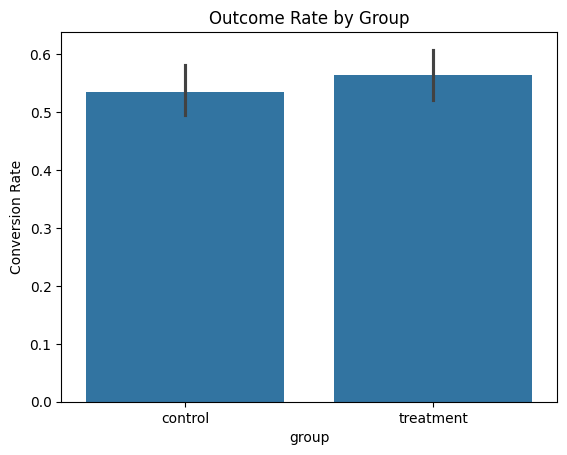

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,description_len,group,outcome
0,8.116280e+17,https://www.airbnb.com/rooms/19541942,20250326054816,2025-03-28,previous scrape,Casa Vacanze - La casa di Dani,"A bright, spacious flat designed to meet every...",The house is a 5-minute walk from the square a...,https://a0.muscache.com/pictures/e0dce64a-ea61...,7.266954e+08,...,IT082009C2PO9Z8KC4,f,36.319426,-18.733489,1.798819,2,0.730685,0.2,control,1
1,4.719469e+17,https://www.airbnb.com/rooms/585215675422559183,20250326054816,2025-03-30,previous scrape,Stanza con bagno privato colorata e centralissima,Villa dei Tramonti is a balcony overlooking th...,The Villa is located in a panoramic area on th...,https://a0.muscache.com/pictures/miso/Hosting-...,3.716919e+08,...,IT082053C2RZQI7JEP,f,-17.048245,-2.919140,9.522062,5,-0.583805,0.8,treatment,1
2,8.923916e+17,https://www.airbnb.com/rooms/1356402762496611983,20250326054816,2025-03-29,previous scrape,Scenario Holiday's Home,Your family will be close to everything when y...,Located in the Arab neighborhood La Kalsa of P...,https://a0.muscache.com/pictures/miso/Hosting-...,2.248988e+07,...,IT087015C2U8EXOF82,f,-8.189771,-37.737343,2.738165,2,-0.168279,0.8,treatment,0
3,1.360655e+18,https://www.airbnb.com/rooms/13327385,20250326054816,2025-03-26,previous scrape,Luxury 3 bedroom villa with pool,The accommodation is part of the Garden on the...,Our apartment is located in the heart of the h...,https://a0.muscache.com/pictures/miso/Hosting-...,2.791986e+08,...,IT082053C2J4E8L57G,f,-82.803601,-5.082821,1.795168,3,-0.120968,0.8,treatment,0
4,4.206511e+17,https://www.airbnb.com/rooms/1078910148820206149,20250326054816,2025-03-30,previous scrape,C'ERA UNA VOLTA - appartamento IRIS,Cozy little apartment located on the cliff of...,"In the heart of the historic center, a few met...",https://a0.muscache.com/pictures/miso/Hosting-...,8.141458e+07,...,IT084020C27WO35QBL,f,24.928948,-4.723321,2.091182,2,0.880201,0.2,control,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.955369e+17,https://www.airbnb.com/rooms/1072221015637825264,20250326054816,2025-03-27,city scrape,Trekking Accommodation,"Valuable apartment in the ""living room"" of Pal...",In the historic center of the city lives the t...,https://a0.muscache.com/pictures/hosting/Hosti...,3.687252e+08,...,19089002C212011,f,20.016126,79.210244,-0.986377,2,0.511845,0.2,control,0
996,1.507582e+18,https://www.airbnb.com/rooms/907167222475352567,20250326054816,2025-03-29,city scrape,"Roccalumera, Bandiera blu 2024 10km da Taormina",Cute and comfortable apartments just steps fro...,"It is located in Villaggio Peruzzo, it is a sm...",https://a0.muscache.com/pictures/3d003bc6-d108...,2.685654e+08,...,IT089002C27YNC28O3,f,-5.010408,95.359338,-0.466068,3,-0.457772,0.8,treatment,0
997,8.887295e+17,https://www.airbnb.com/rooms/1038107857158715397,20250326054816,2025-03-27,previous scrape,The house of the islands Sea view,"Not Included: Final Cleaning (€120), Sheets an...","We are on the waterfront of Giardini Naxos, a ...",https://a0.muscache.com/pictures/45a8ce56-6012...,5.347431e+08,...,IT082053C2VGFS3KED,t,25.884035,72.009677,-1.406311,5,0.792425,0.2,control,1
998,2.403596e+17,https://www.airbnb.com/rooms/34711707,20250326054816,2025-03-29,previous scrape,"Al Medina campagna, città e mare",Beautiful independent and finely furnished cot...,Neighborhood in the heart of the historic cent...,https://a0.muscache.com/pictures/prohost-api/H...,-1.604502e+08,...,IT083041C2Z6FWIT35,t,36.815557,7.359291,-0.237597,3,-0.409601,0.8,treatment,1


In [20]:
simulate_ab_test_logistics(
    df=synthetic_df,
    treatment_col='description_len',
    treatment_func=lambda g: 0.8 if g == 'treatment' else 0.2,
    outcome_func=booking_outcome,
)
